In [14]:
# TensorFlow 설치
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# TensorFlow 모듈 임포트
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [16]:
import numpy as np
import random
import os

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)


In [17]:
# 1. MNIST 데이터셋 불러오기
# Keras에서 기본 제공하는 손글씨 숫자 이미지 데이터셋입니다.
# 28x28 픽셀 크기의 흑백 이미지이며, 총 10개의 클래스(0~9 숫자)가 있습니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
# 2. 입력 데이터 정규화
# 픽셀 값이 0~255 사이이므로, 0~1 사이로 스케일을 조정하여 학습 효율을 높입니다.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# 3. 정답 데이터 one-hot 인코딩
# 다중 클래스 분류를 위해 정답 레이블을 원-핫 벡터로 변환합니다.
# 예: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train= to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
# 4. 모델 구성
# Sequential API를 사용하여 신경망을 구성합니다.
# - Flatten: 28x28 이미지를 784 차원의 벡터로 펼칩니다.
# - Dense(128): 은닉층, ReLU 활성화 함수
# - Dense(10): 출력층, Softmax 활성화 함수로 10개 클래스의 확률 출력
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 5. 모델 컴파일
# - Adam 옵티마이저: 학습 속도와 성능이 좋은 알고리즘
# - categorical_crossentropy: 다중 클래스 분류에 적합한 손실 함수
# - metrics: 모델 평가 지표로 정확도 사용
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# 6. 모델 학습
# - epochs: 전체 데이터셋을 5번 반복 학습
# - batch_size: 한 번에 32개씩 처리
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9276 - loss: 0.2530
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9670 - loss: 0.1112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0547
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0403


In [23]:
# 7. 모델 평가
# 테스트 데이터셋으로 모델 성능을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9758 - loss: 0.0810

Test accuracy: 97.58%


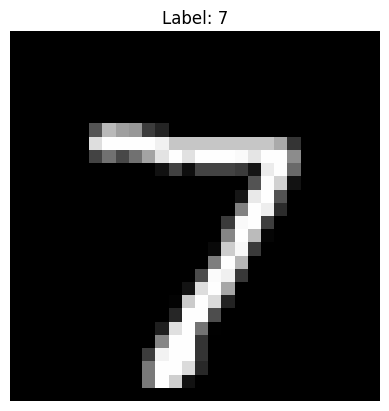

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 이미지에서 하나 선택 (예: 인덱스 0)
image = x_test[0]   # x_test는 (num_samples, 28, 28) 형태라고 가정
label = np.argmax(y_test[0])  # 원-핫 인코딩된 경우 정답 레이블 복원

# 시각화
plt.imshow(image, cmap='gray')   # 흑백 이미지
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()
